# Week 6-SVM-pulsar_data

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset  

In [2]:
df=pd.read_csv('pulsar_data.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## 3. Explore the data to gain insights about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [4]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
df.iloc[:,-1].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [6]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [7]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
def remove_leading_spaces(columns):
    return [column.strip() for column in columns]

col = df.columns
col = remove_leading_spaces(col)
df.columns=col

In [9]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [10]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [11]:
df.columns = ['Mean_Integrated_Profile',
              'Std_Dev_Integrated_Profile',
              'Excess_Kurtosis_Integrated_Profile',
              'Skewness_Integrated_Profile',
              'Mean_DM_SNR_Curve',
              'Std_Dev_DM_SNR_Curve',
              'Excess_Kurtosis_DM_SNR_Curve',
              'Skewness_DM_SNR_Curve',
              'Target_Class']
df

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve,Target_Class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Mean_Integrated_Profile               0
Std_Dev_Integrated_Profile            0
Excess_Kurtosis_Integrated_Profile    0
Skewness_Integrated_Profile           0
Mean_DM_SNR_Curve                     0
Std_Dev_DM_SNR_Curve                  0
Excess_Kurtosis_DM_SNR_Curve          0
Skewness_DM_SNR_Curve                 0
Target_Class                          0
dtype: int64

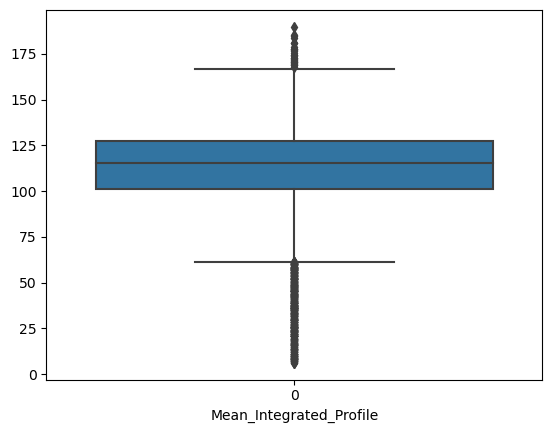

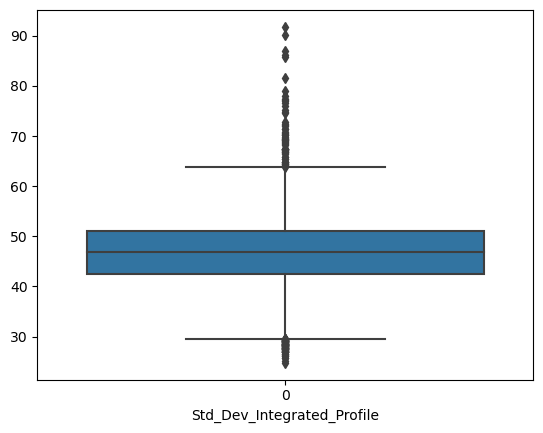

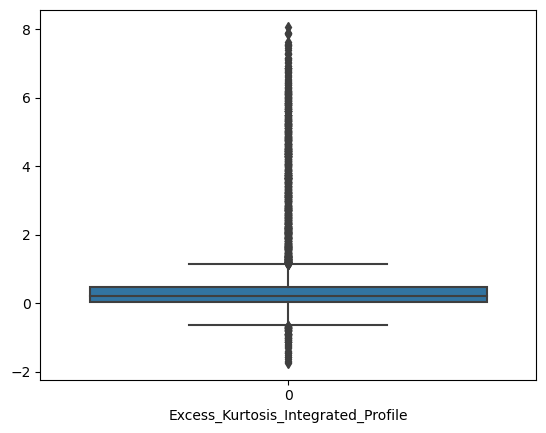

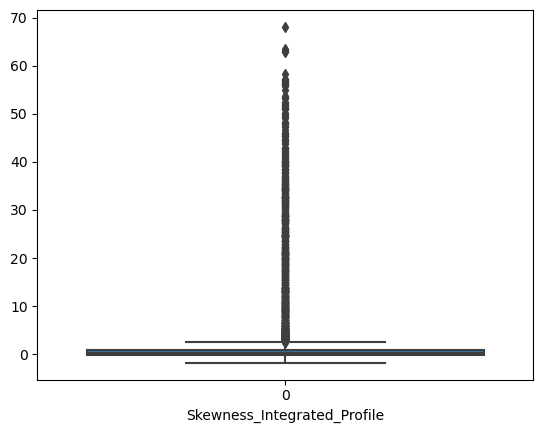

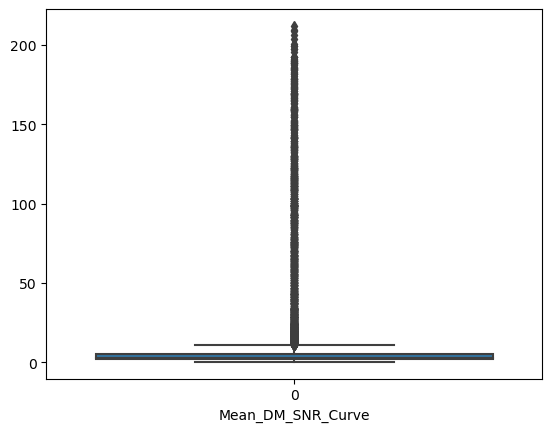

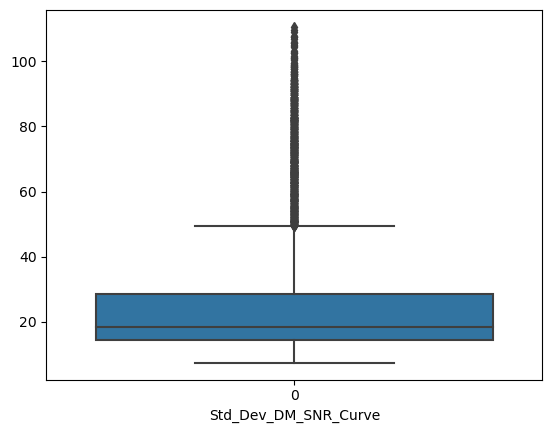

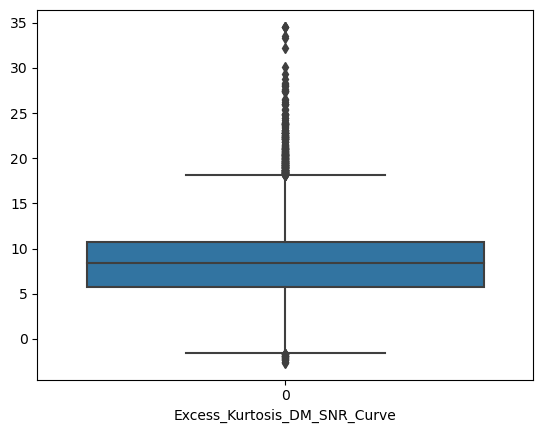

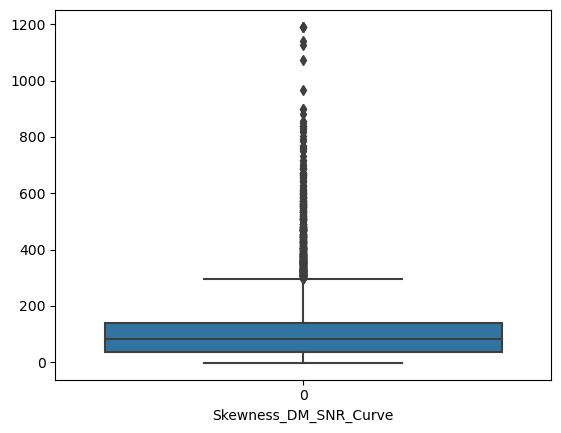

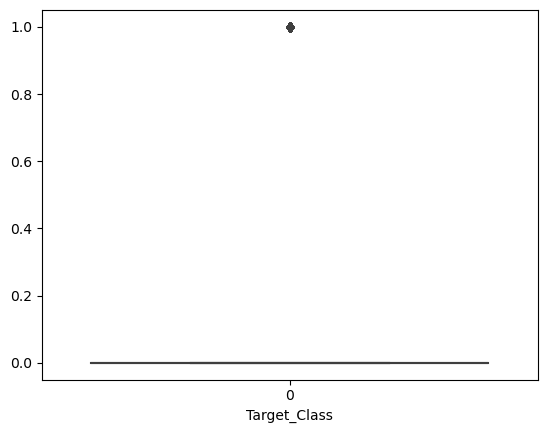

In [14]:
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    plt.show()

In [22]:
def remove_outliers(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        ul = q3 + (1.5 * iqr)
        ll = q1 - (1.5 * iqr)
        med = data[col].median()
        data[col] = data[col].apply(lambda x: med if (x > ul or x < ll) else x)
    return data
X=remove_outliers(X)

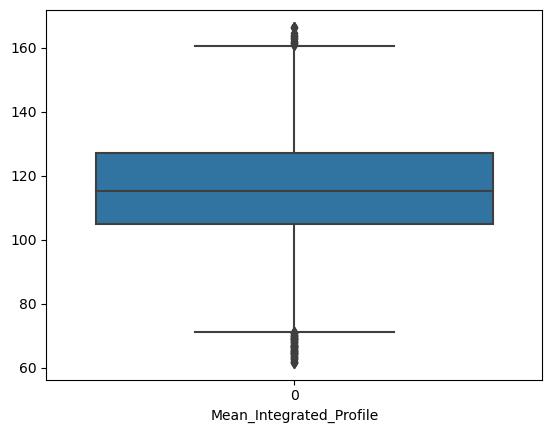

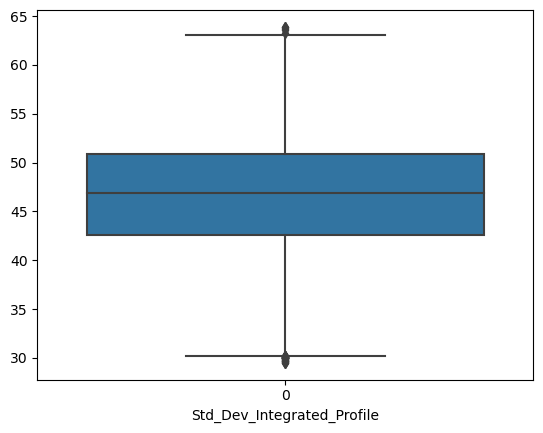

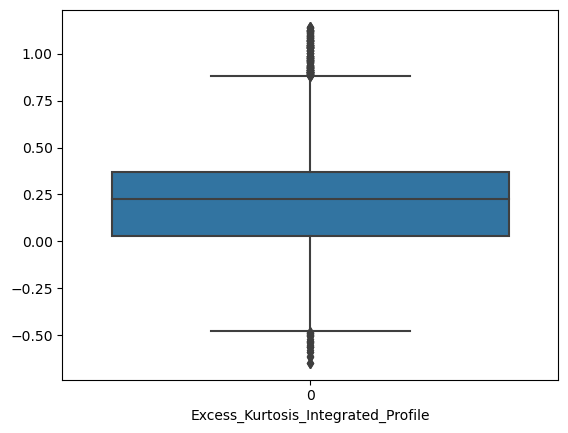

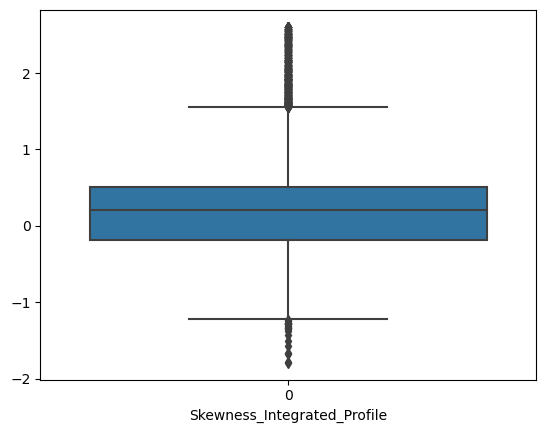

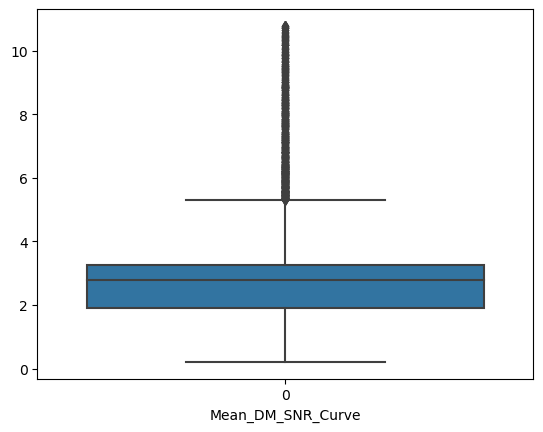

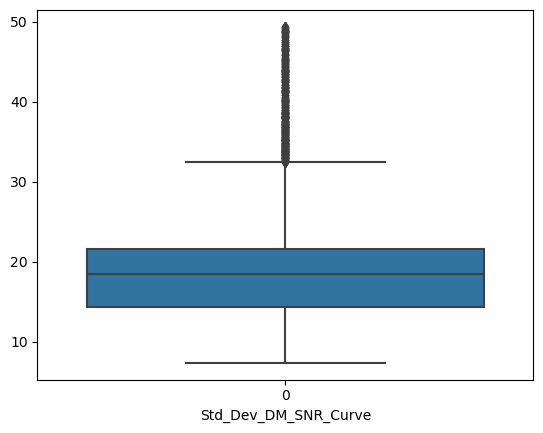

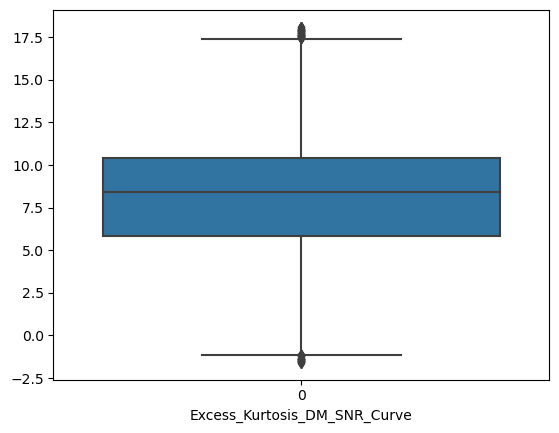

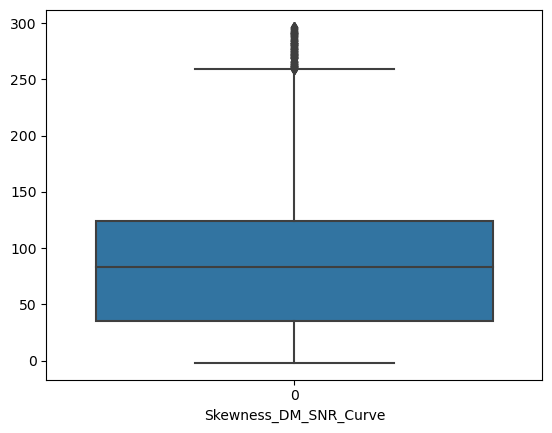

In [23]:
for col in X.columns:
    sns.boxplot(data=X[col])
    plt.xlabel(col)
    plt.show()

## 4. Check the distribution of variables

<Axes: >

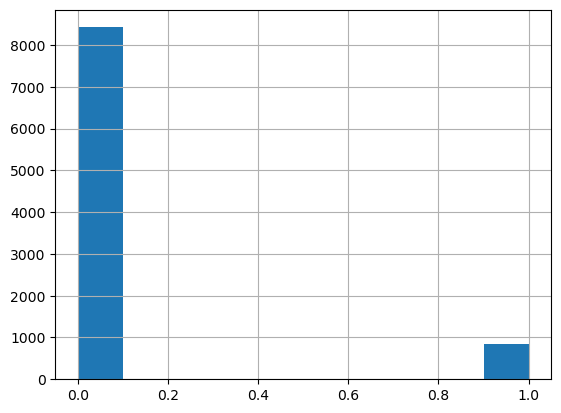

In [16]:
df["Target_Class"].hist()

In [17]:
df["Target_Class"].value_counts()

0.0    8423
1.0     850
Name: Target_Class, dtype: int64

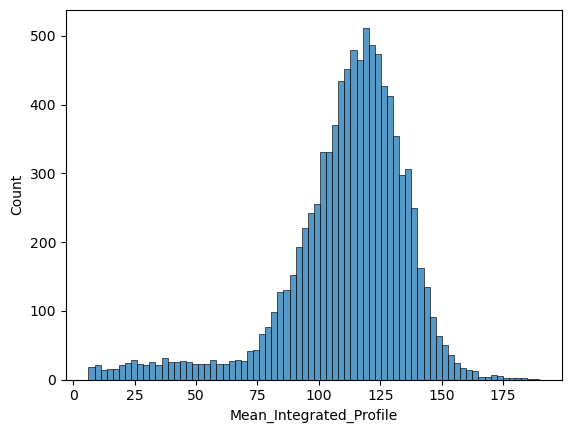

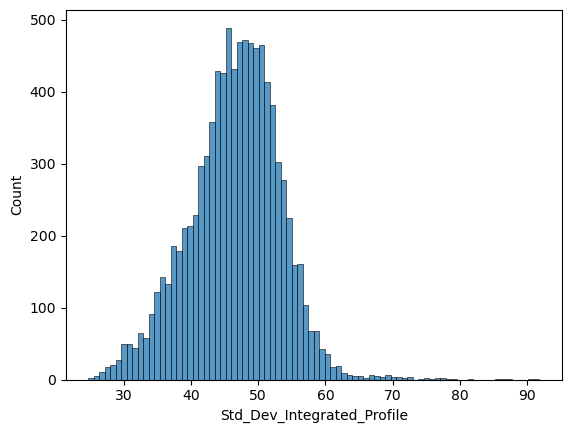

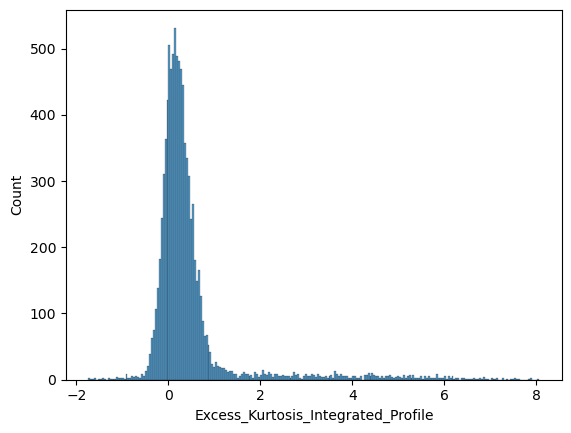

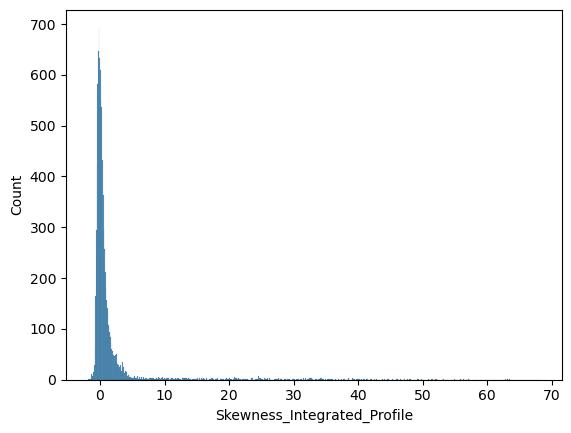

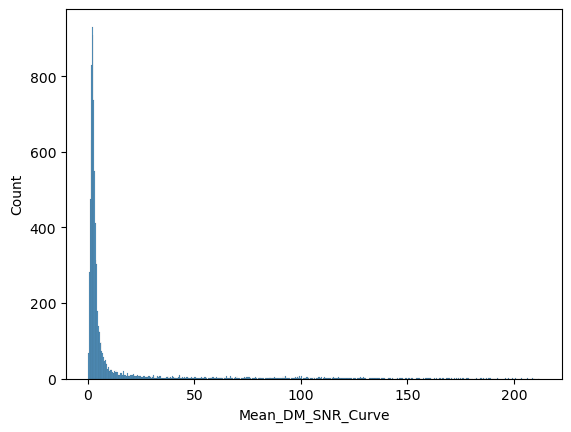

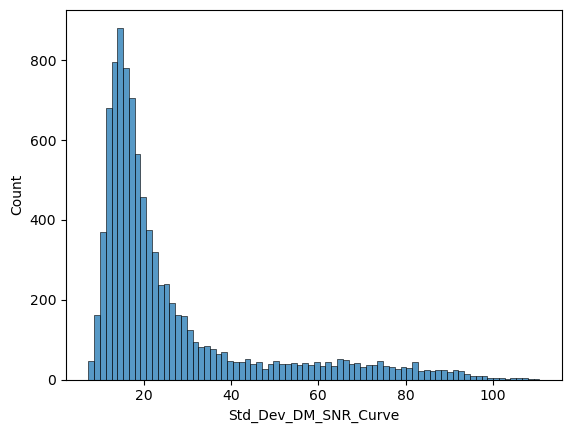

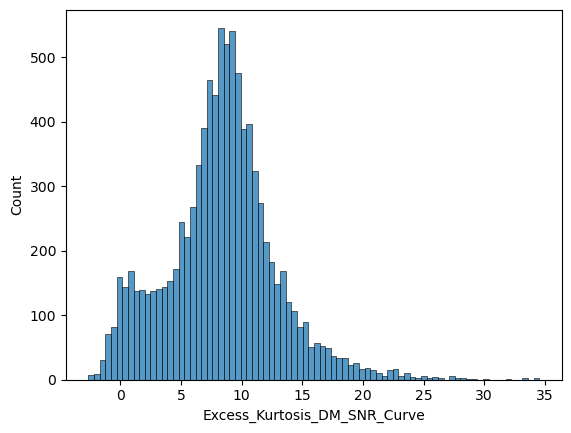

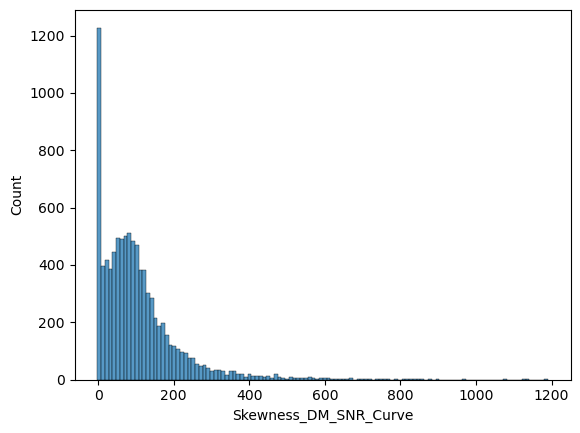

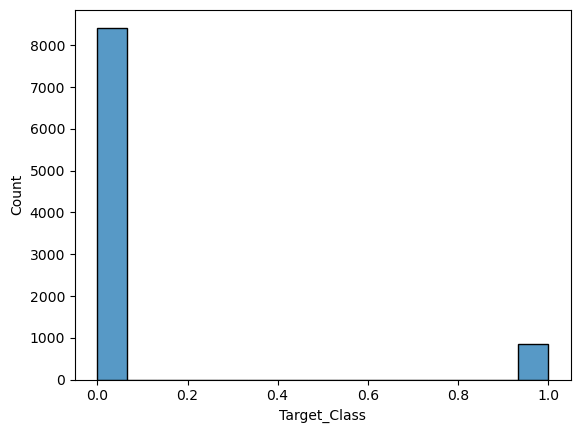

In [18]:
for col in df.columns:
    sns.histplot(data=df[col])
    plt.xlabel(col)
    plt.show()

## 5. Split data into separate training and test set 

In [19]:
X=df.iloc[:,:-1]
X

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578
...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [20]:
y=df.iloc[:,-1]
y

0        0.0
1        0.0
2        0.0
4        0.0
7        0.0
        ... 
12522    0.0
12523    0.0
12525    0.0
12526    0.0
12527    0.0
Name: Target_Class, Length: 9273, dtype: float64

In [21]:
y.value_counts()

0.0    8423
1.0     850
Name: Target_Class, dtype: int64

## 6. Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
#standard scaling is feature scaling
from sklearn.preprocessing import StandardScaler

def scale(df):
    scaler = StandardScaler()
    for col in df.columns:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))#scaling should be done to the col values
    return df

X = scale(X)
X

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
0,0.334529,0.299964,0.582137,-0.411926,0.127732,-0.135315,-0.140899,-0.333493
1,-2.193641,-1.659906,1.806310,-0.087066,-0.320375,-0.244347,0.358262,0.223622
2,0.874045,1.080311,-0.296142,-0.839072,-0.120188,0.386327,0.128016,-0.201910
4,-1.745311,-1.669209,2.213075,-0.087066,-0.092912,0.156707,0.101758,-0.168395
7,-0.337742,1.511411,1.270104,-0.307555,-0.088529,0.009095,0.365536,0.144298
...,...,...,...,...,...,...,...,...
12522,0.544614,0.655668,0.067231,-0.823533,-0.353496,-0.720954,0.310382,0.439937
12523,0.515113,1.072200,-0.825215,-1.228181,2.468116,1.300535,-0.882355,-0.977675
12525,0.041304,-0.529000,1.626928,0.259076,-1.260913,-1.026556,2.299383,-0.066640
12526,1.164588,0.550748,-1.106475,-0.733042,0.530054,0.272994,-0.153977,-0.375396


In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=5)#use this so that wont take all 0s only

In [28]:
X_train

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
838,0.598700,1.820583,-0.998256,-1.454085,-0.161103,-0.261938,0.498782,0.406039
6085,1.420265,1.580206,-1.991237,-1.103107,-0.088529,-0.130601,-1.984351,-1.327701
6628,1.176209,0.963578,-0.143606,-1.038036,-0.497183,-0.602330,0.430104,0.412839
6755,0.901311,0.179589,-0.668397,-0.543893,0.413156,0.830638,-0.124458,-0.442794
11233,-0.504916,0.232735,0.446010,-0.203669,-0.304302,-0.322286,0.477945,0.405529
...,...,...,...,...,...,...,...,...
9837,0.601382,1.907090,-0.595860,-1.309851,-0.354470,-0.281887,0.248637,0.061273
4087,-0.556320,1.233548,0.066685,-0.813885,-1.138657,-1.192496,2.099200,-0.066640
5516,-0.004289,-2.003521,0.032020,-0.087066,-0.088529,-0.130601,-1.595924,-1.271881
3014,1.133745,-0.326095,-0.604304,-0.066804,0.479885,-0.041942,-0.280940,-0.445873


In [29]:
X_test

,Mean_Integrated_Profile,Std_Dev_Integrated_Profile,Excess_Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR_Curve,Std_Dev_DM_SNR_Curve,Excess_Kurtosis_DM_SNR_Curve,Skewness_DM_SNR_Curve
1728,0.047115,0.429951,0.184374,0.413891,-1.464996,-1.477810,0.107465,-0.066640
6330,0.254071,0.497824,-0.333278,-0.472418,0.448225,0.230836,-0.216786,-0.448187
6423,0.308157,1.134405,-0.433288,-0.981641,-0.088529,3.068447,-1.198438,-1.155042
11127,0.791352,0.062489,-1.078653,-1.850248,-1.353456,-1.433077,0.107465,-0.066640
8712,-0.004289,-1.719661,0.032020,-0.087066,-0.088529,-0.130601,-1.967077,-1.321233
...,...,...,...,...,...,...,...,...
10231,-0.350705,-1.230928,1.799689,2.156568,-0.066123,0.420041,0.167922,-0.148542
2928,0.300111,0.663895,-0.087133,-0.564674,1.156916,0.893838,-0.466976,-0.691694
9528,-0.528160,-0.701046,0.799689,0.300857,0.704913,0.958574,-0.331834,-0.628933
4253,0.617026,1.982673,-1.266002,-1.310564,-0.769456,-0.221132,0.970710,0.859884


In [30]:
y_train

838      0.0
6085     0.0
6628     0.0
6755     0.0
11233    0.0
        ... 
9837     0.0
4087     0.0
5516     1.0
3014     0.0
3921     0.0
Name: Target_Class, Length: 7418, dtype: float64

In [31]:
y_test

1728     0.0
6330     0.0
6423     0.0
11127    0.0
8712     1.0
        ... 
10231    0.0
2928     0.0
9528     0.0
4253     0.0
604      0.0
Name: Target_Class, Length: 1855, dtype: float64

## Run SVM MODELS
7. Run SVM with default hyperparameters 

    Run SVM with rbf kernel and C=1.0 and gamma=auto 
    
    Run SVM with rbf kernel and C=100.0
    
    Run SVM with rbf kernel and C=1000.0
    
8. Run SVM with linear kernel

    Run SVM with linear kernel and C=1.0
    
    Run SVM with linear kernel and C=100.0
    
    Run SVM with linear kernel and C=1000.0
    
9. Run SVM with polynomial kernel

    Run SVM with polynomial kernel and C=1.0
    
    Run SVM with polynomial kernel and C=100.0
    
    Run SVM with polynomial kernel and C=1000.0
    
10. Run SVM with sigmoid kernel 

    Run SVM with sigmoid kernel and C=1.0
    
    Run SVM with sigmoid kernel and C=100.0
    
    Run SVM with sigmoid kernel and C=1000.0
    
11. Compare the train-set and test-set accuracy

12. Check for overfitting and underfitting

13. visualize confusion matrix with seaborn heatmap

14. Generate classification report 

15. Evaluate classification accuracy

16. Evaluate Classification error


In [32]:
def running_svm(model,c):
    cl=svm.SVC(kernel=model,C=c)
    return cl

In [33]:
svm_default_1=running_svm("rbf",1.0)
svm_default_2=running_svm("rbf",100.0)
svm_default_3=running_svm("rbf",1000.0)

In [34]:
svm_linear_1=running_svm("linear",1.0)
svm_linear_2=running_svm("linear",100.0)
svm_linear_3=running_svm("linear",1000.0)

In [35]:
svm_poly_1=running_svm("poly",1.0)
svm_poly_2=running_svm("poly",100.0)
svm_poly_3=running_svm("poly",1000.0)

In [36]:
svm_sigmoid_1=running_svm("poly",1.0)
svm_sigmoid_2=running_svm("poly",100.0)
svm_sigmoid_3=running_svm("poly",1000.0)

In [37]:
models = {
    'svm_rbf_C1': svm_default_1,
    'svm_rbf_C100': svm_default_2,
    'svm_rbf_C1000': svm_default_3,
    'svm_linear_C1': svm_linear_1,
    'svm_linear_C100': svm_linear_2,
    'svm_linear_C1000': svm_linear_3,
    'svm_poly_C1': svm_poly_1,
    'svm_poly_C100': svm_poly_2,
    'svm_poly_C1000': svm_poly_3,
    'svm_sigmoid_C1': svm_sigmoid_1,
    'svm_sigmoid_C100': svm_sigmoid_2,
    'svm_sigmoid_C1000': svm_sigmoid_3
}

In [38]:
def fit_test_svm(models,X_test,X_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(X_train,y_train)
        y_pred=mod.predict(X_test)
        y_train_pred=mod.predict(X_train)
        print("Model name",model)
        print("Test set metrics")
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Precision:",precision_score(y_test, y_pred))
        print("Recall:",recall_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Train set metrics")
        print("Accuracy:",accuracy_score(y_train,y_train_pred))
        print("Precision:",precision_score(y_train,y_train_pred))
        print("Recall:",recall_score(y_train,y_train_pred))
        print("Classification report is")
        print(classification_report(y_train,y_train_pred))
        print("confusion matrix is")
        cm=confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot=True)
        plt.show()

Model name svm_rbf_C1
Test set metrics
Accuracy: 0.9644204851752022
Precision: 0.863905325443787
Recall: 0.7724867724867724
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1666
         1.0       0.86      0.77      0.82       189

    accuracy                           0.96      1855
   macro avg       0.92      0.88      0.90      1855
weighted avg       0.96      0.96      0.96      1855

Train set metrics
Accuracy: 0.9692639525478566
Precision: 0.868824531516184
Recall: 0.7715582450832073
Classification report is
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      6757
         1.0       0.87      0.77      0.82       661

    accuracy                           0.97      7418
   macro avg       0.92      0.88      0.90      7418
weighted avg       0.97      0.97      0.97      7418

confusion matrix is


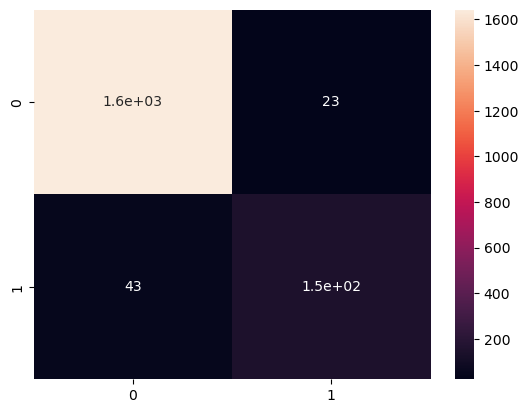

Model name svm_rbf_C100
Test set metrics
Accuracy: 0.969811320754717
Precision: 0.8888888888888888
Recall: 0.8042328042328042
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1666
         1.0       0.89      0.80      0.84       189

    accuracy                           0.97      1855
   macro avg       0.93      0.90      0.91      1855
weighted avg       0.97      0.97      0.97      1855

Train set metrics
Accuracy: 0.9813966028579132
Precision: 0.9131121642969984
Recall: 0.8744326777609682
Classification report is
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6757
         1.0       0.91      0.87      0.89       661

    accuracy                           0.98      7418
   macro avg       0.95      0.93      0.94      7418
weighted avg       0.98      0.98      0.98      7418

confusion matrix is


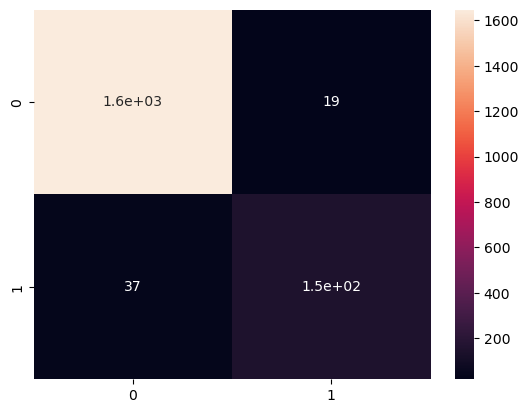

Model name svm_rbf_C1000
Test set metrics
Accuracy: 0.9654986522911051
Precision: 0.8654970760233918
Recall: 0.783068783068783
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1666
         1.0       0.87      0.78      0.82       189

    accuracy                           0.97      1855
   macro avg       0.92      0.88      0.90      1855
weighted avg       0.96      0.97      0.96      1855

Train set metrics
Accuracy: 0.9889458074952817
Precision: 0.9502332814930016
Recall: 0.924357034795764
Classification report is
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6757
         1.0       0.95      0.92      0.94       661

    accuracy                           0.99      7418
   macro avg       0.97      0.96      0.97      7418
weighted avg       0.99      0.99      0.99      7418

confusion matrix is


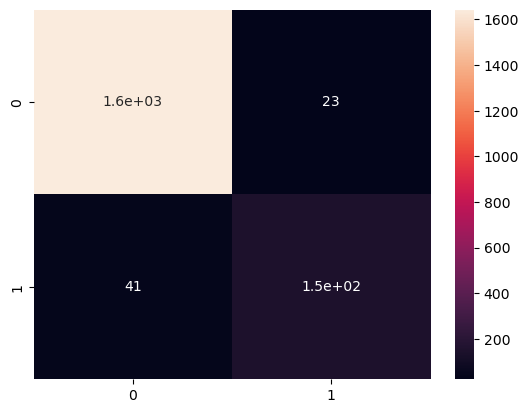

Model name svm_linear_C1
Test set metrics
Accuracy: 0.9460916442048517
Precision: 0.8396946564885496
Recall: 0.582010582010582
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1666
         1.0       0.84      0.58      0.69       189

    accuracy                           0.95      1855
   macro avg       0.90      0.78      0.83      1855
weighted avg       0.94      0.95      0.94      1855

Train set metrics
Accuracy: 0.9514693987597735
Precision: 0.8351893095768375
Recall: 0.56732223903177
Classification report is
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      6757
         1.0       0.84      0.57      0.68       661

    accuracy                           0.95      7418
   macro avg       0.90      0.78      0.82      7418
weighted avg       0.95      0.95      0.95      7418

confusion matrix is


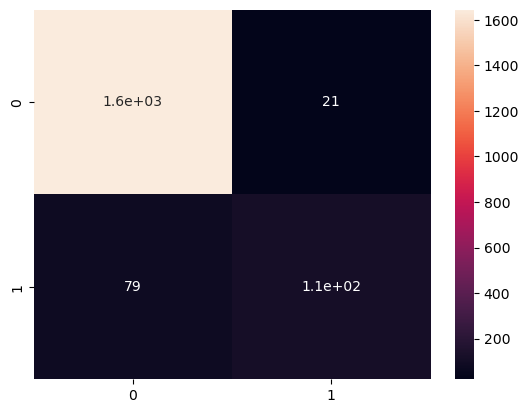

Model name svm_linear_C100
Test set metrics
Accuracy: 0.9460916442048517
Precision: 0.8396946564885496
Recall: 0.582010582010582
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1666
         1.0       0.84      0.58      0.69       189

    accuracy                           0.95      1855
   macro avg       0.90      0.78      0.83      1855
weighted avg       0.94      0.95      0.94      1855

Train set metrics
Accuracy: 0.9513345915341063
Precision: 0.8333333333333334
Recall: 0.56732223903177
Classification report is
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      6757
         1.0       0.83      0.57      0.68       661

    accuracy                           0.95      7418
   macro avg       0.90      0.78      0.82      7418
weighted avg       0.95      0.95      0.95      7418

confusion matrix is


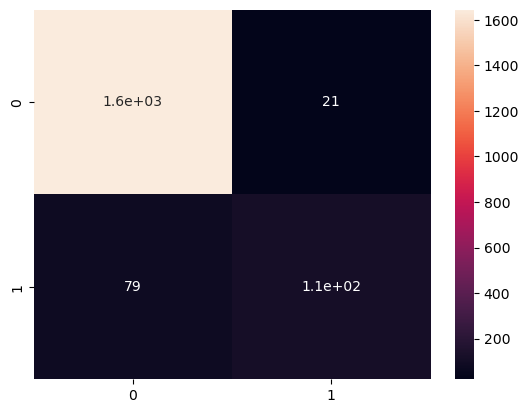

Model name svm_linear_C1000
Test set metrics
Accuracy: 0.9460916442048517
Precision: 0.8396946564885496
Recall: 0.582010582010582
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1666
         1.0       0.84      0.58      0.69       189

    accuracy                           0.95      1855
   macro avg       0.90      0.78      0.83      1855
weighted avg       0.94      0.95      0.94      1855

Train set metrics
Accuracy: 0.9513345915341063
Precision: 0.8333333333333334
Recall: 0.56732223903177
Classification report is
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      6757
         1.0       0.83      0.57      0.68       661

    accuracy                           0.95      7418
   macro avg       0.90      0.78      0.82      7418
weighted avg       0.95      0.95      0.95      7418

confusion matrix is


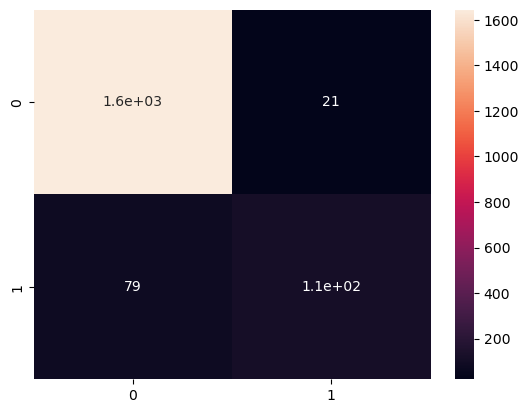

Model name svm_poly_C1
Test set metrics
Accuracy: 0.9574123989218328
Precision: 0.9296875
Recall: 0.6296296296296297
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1666
         1.0       0.93      0.63      0.75       189

    accuracy                           0.96      1855
   macro avg       0.94      0.81      0.86      1855
weighted avg       0.96      0.96      0.95      1855

Train set metrics
Accuracy: 0.9615799406848207
Precision: 0.8949579831932774
Recall: 0.6444780635400907
Classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6757
         1.0       0.89      0.64      0.75       661

    accuracy                           0.96      7418
   macro avg       0.93      0.82      0.86      7418
weighted avg       0.96      0.96      0.96      7418

confusion matrix is


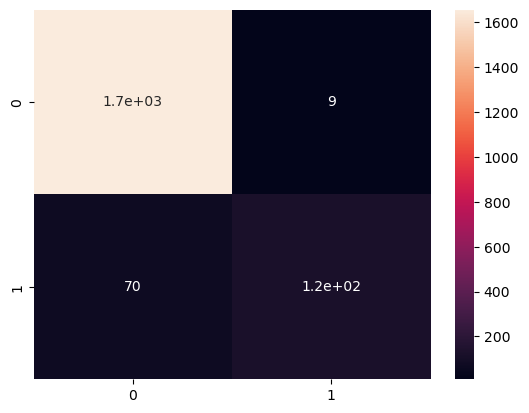

Model name svm_poly_C100
Test set metrics
Accuracy: 0.9590296495956874
Precision: 0.924812030075188
Recall: 0.6507936507936508
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1666
         1.0       0.92      0.65      0.76       189

    accuracy                           0.96      1855
   macro avg       0.94      0.82      0.87      1855
weighted avg       0.96      0.96      0.96      1855

Train set metrics
Accuracy: 0.9627932057158264
Precision: 0.8952772073921971
Recall: 0.659606656580938
Classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6757
         1.0       0.90      0.66      0.76       661

    accuracy                           0.96      7418
   macro avg       0.93      0.83      0.87      7418
weighted avg       0.96      0.96      0.96      7418

confusion matrix is


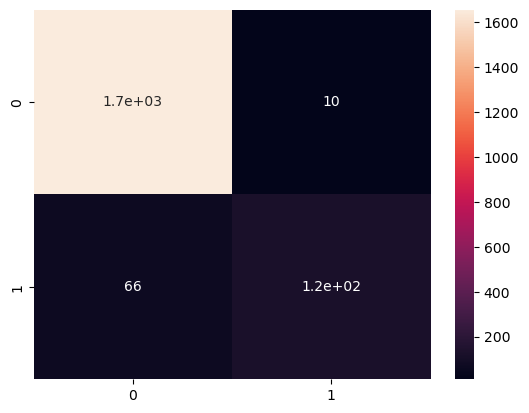

Model name svm_poly_C1000
Test set metrics
Accuracy: 0.9568733153638814
Precision: 0.8978102189781022
Recall: 0.6507936507936508
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1666
         1.0       0.90      0.65      0.75       189

    accuracy                           0.96      1855
   macro avg       0.93      0.82      0.87      1855
weighted avg       0.96      0.96      0.95      1855

Train set metrics
Accuracy: 0.964006470746832
Precision: 0.8971774193548387
Recall: 0.6732223903177005
Classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6757
         1.0       0.90      0.67      0.77       661

    accuracy                           0.96      7418
   macro avg       0.93      0.83      0.87      7418
weighted avg       0.96      0.96      0.96      7418

confusion matrix is


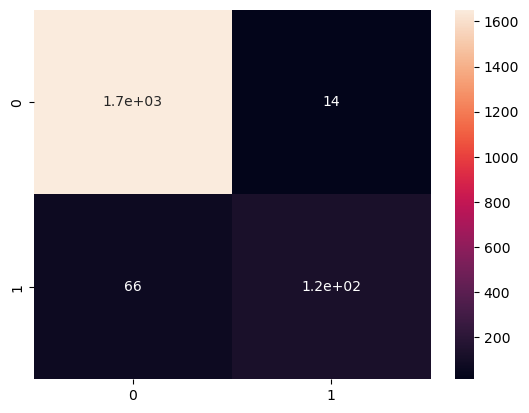

Model name svm_sigmoid_C1
Test set metrics
Accuracy: 0.9574123989218328
Precision: 0.9296875
Recall: 0.6296296296296297
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1666
         1.0       0.93      0.63      0.75       189

    accuracy                           0.96      1855
   macro avg       0.94      0.81      0.86      1855
weighted avg       0.96      0.96      0.95      1855

Train set metrics
Accuracy: 0.9615799406848207
Precision: 0.8949579831932774
Recall: 0.6444780635400907
Classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6757
         1.0       0.89      0.64      0.75       661

    accuracy                           0.96      7418
   macro avg       0.93      0.82      0.86      7418
weighted avg       0.96      0.96      0.96      7418

confusion matrix is


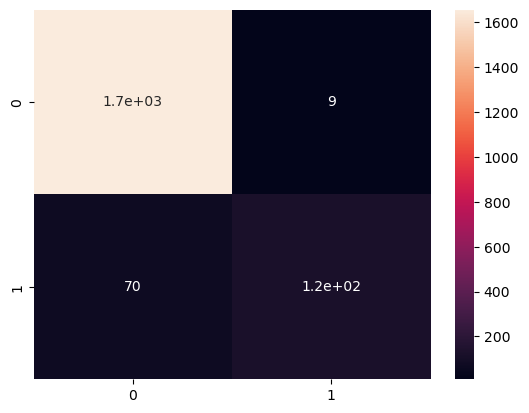

Model name svm_sigmoid_C100
Test set metrics
Accuracy: 0.9590296495956874
Precision: 0.924812030075188
Recall: 0.6507936507936508
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1666
         1.0       0.92      0.65      0.76       189

    accuracy                           0.96      1855
   macro avg       0.94      0.82      0.87      1855
weighted avg       0.96      0.96      0.96      1855

Train set metrics
Accuracy: 0.9627932057158264
Precision: 0.8952772073921971
Recall: 0.659606656580938
Classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6757
         1.0       0.90      0.66      0.76       661

    accuracy                           0.96      7418
   macro avg       0.93      0.83      0.87      7418
weighted avg       0.96      0.96      0.96      7418

confusion matrix is


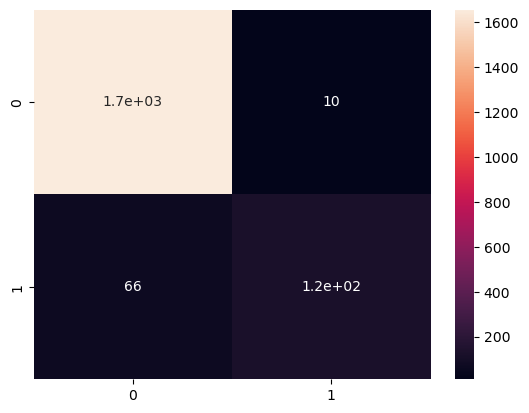

Model name svm_sigmoid_C1000
Test set metrics
Accuracy: 0.9568733153638814
Precision: 0.8978102189781022
Recall: 0.6507936507936508
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1666
         1.0       0.90      0.65      0.75       189

    accuracy                           0.96      1855
   macro avg       0.93      0.82      0.87      1855
weighted avg       0.96      0.96      0.95      1855

Train set metrics
Accuracy: 0.964006470746832
Precision: 0.8971774193548387
Recall: 0.6732223903177005
Classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6757
         1.0       0.90      0.67      0.77       661

    accuracy                           0.96      7418
   macro avg       0.93      0.83      0.87      7418
weighted avg       0.96      0.96      0.96      7418

confusion matrix is


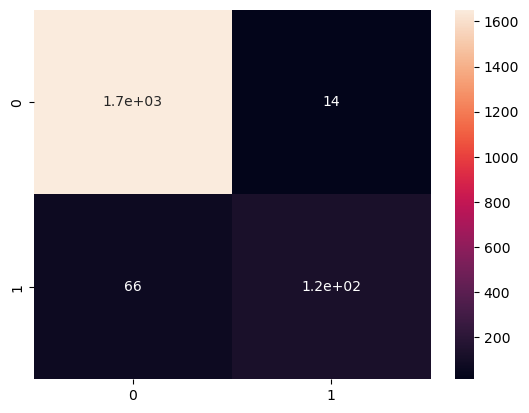

In [39]:
fit_test_svm(models,X_test,X_train,y_test,y_train)

## 17. Plot ROC Curve
## 18. Compute ROC AUC

In [40]:
from sklearn import metrics
def plot_roc_auc(models,X_test,X_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(X_train,y_train)
        y_pred=mod.predict(X_test)
        fpr,tpr,_ =metrics.roc_curve(y_test,y_pred)
        auc=metrics.roc_auc_score(y_test,y_pred)
        plt.title('Roc and Auc for Model '+str(model))
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()  

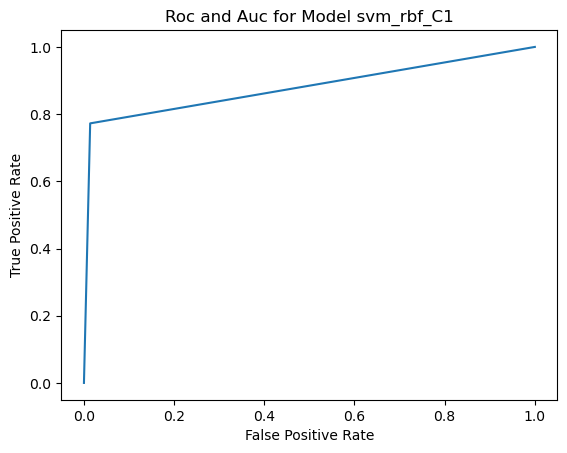

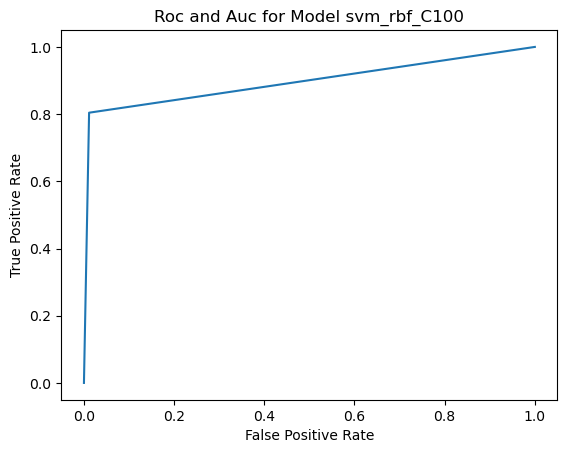

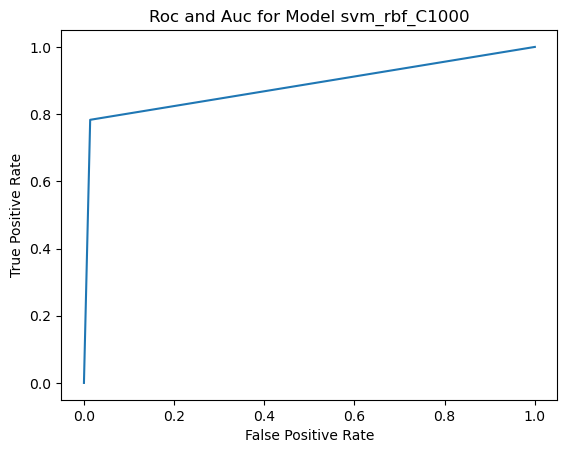

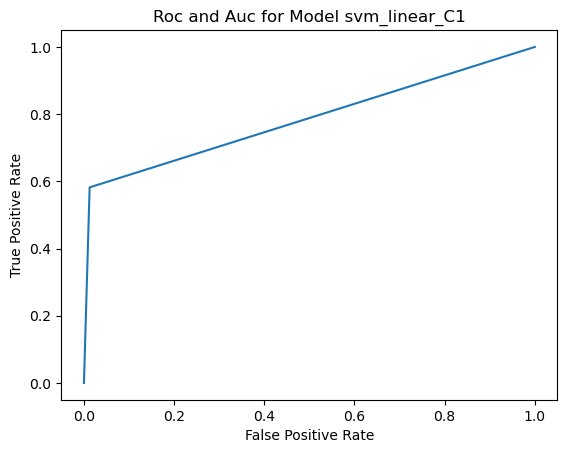

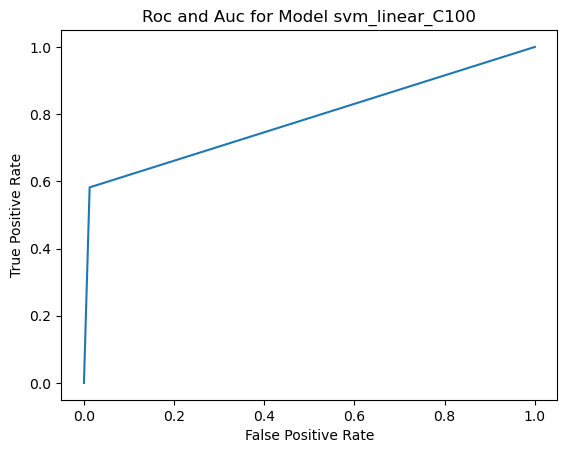

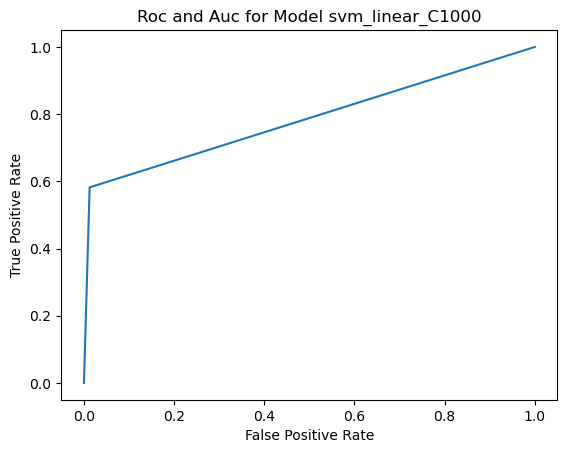

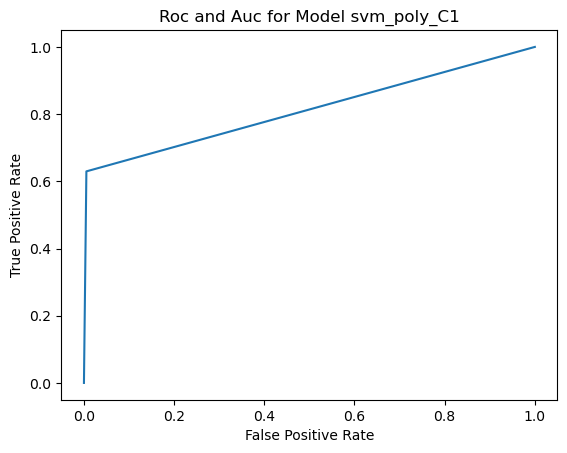

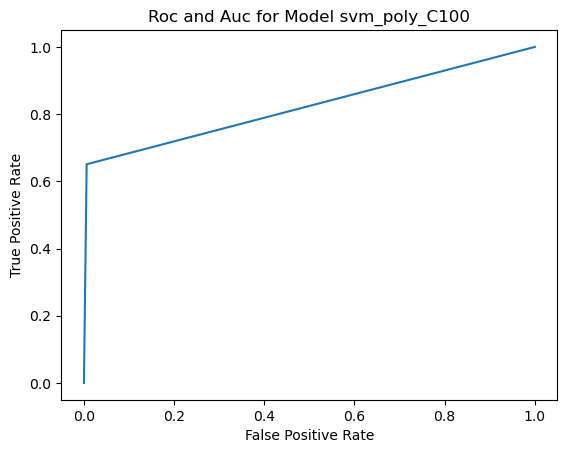

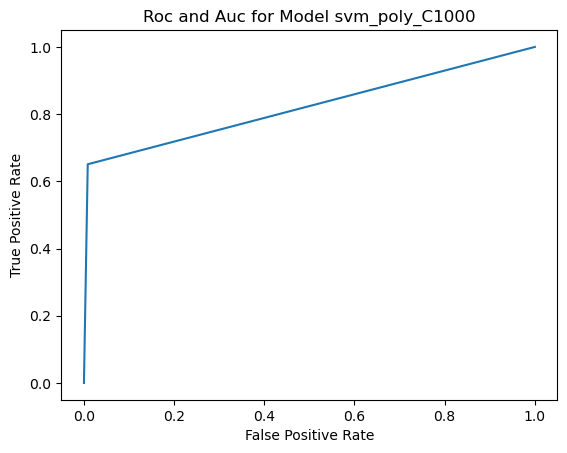

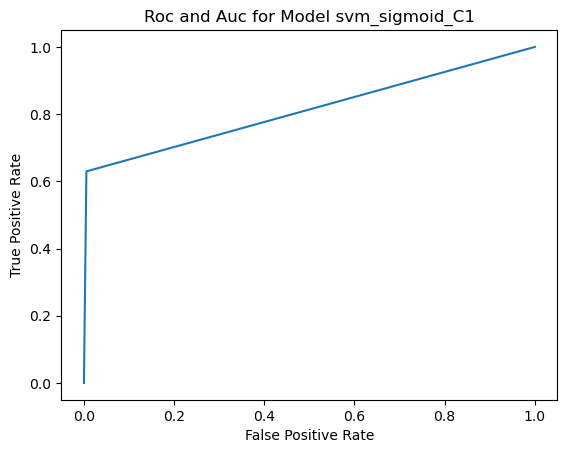

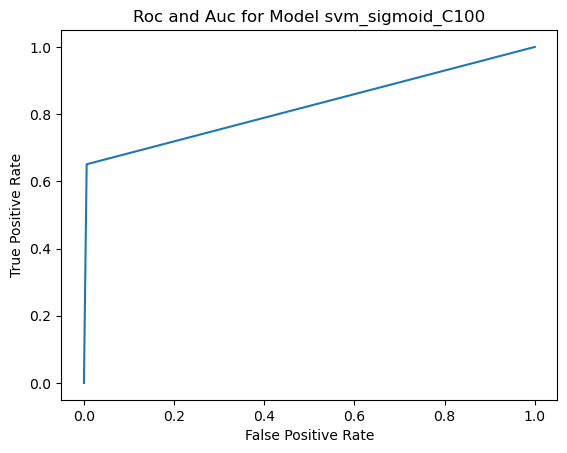

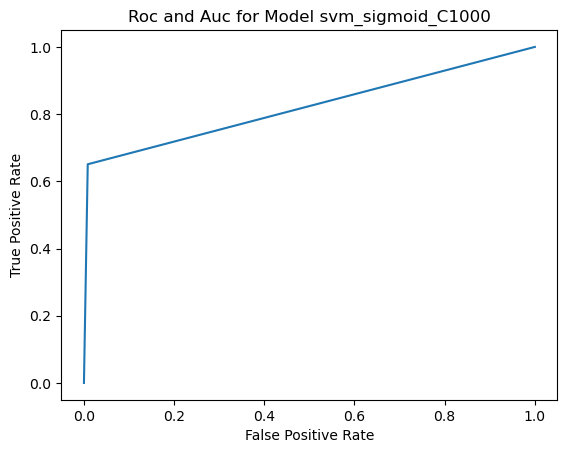

In [41]:
plot_roc_auc(models,X_test,X_train,y_test,y_train)

## 19. Stratified k-fold cross-validation with shuffle split with linear kernel
## 21. Stratified k-fold cross-validation with shuffle split with rbf kernel
## 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel
## 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [42]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC


# Linear kernel with stratified k-fold cross-validation and shuffle split
linear_svc = SVC(kernel='linear')
linear_cv = StratifiedKFold(n_splits=5, shuffle=True)
linear_scores = cross_val_score(linear_svc, X, y, cv=linear_cv)
print("Linear kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", linear_scores.mean())

# RBF kernel with stratified k-fold cross-validation and shuffle split
rbf_svc = SVC(kernel='rbf')
rbf_cv = StratifiedKFold(n_splits=5, shuffle=True)
rbf_scores = cross_val_score(rbf_svc, X, y, cv=rbf_cv)
print("RBF kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", rbf_scores.mean())

# Polynomial kernel with stratified k-fold cross-validation and shuffle split
poly_svc = SVC(kernel='poly')
poly_cv = StratifiedKFold(n_splits=5, shuffle=True)
poly_scores = cross_val_score(poly_svc, X, y, cv=poly_cv)
print("Polynomial kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", poly_scores.mean())

# Sigmoid kernel with stratified k-fold cross-validation and shuffle split
sigmoid_svc = SVC(kernel='sigmoid')
sigmoid_cv = StratifiedKFold(n_splits=5, shuffle=True)
sigmoid_scores = cross_val_score(sigmoid_svc, X, y, cv=sigmoid_cv)
print("Sigmoid kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", sigmoid_scores.mean())

Linear kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.950717062547068
RBF kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.9663527537167397
Polynomial kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.9581575205645547
Sigmoid kernel with stratified k-fold cross-validation and shuffle split:
Mean Accuracy: 0.8513965288136381


In [43]:
def stratified_shuffle_split(models, X, y):
    results = {}
    for model_name, model_instance in models.items():
        sss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
        scores = []
        for train_index, test_index in sss.split(X, y):
            X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]#for the indexing to be proper np.array use
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            try:
                model_instance.fit(X_train, y_train)
                pred = model_instance.predict(X_test)
                scores.append(accuracy_score(y_test, pred))
            except Exception as e:
                print(f"Error occurred with model {model_name}: {str(e)}")
                scores.append(None)
        results[model_name] = scores
        print('Shuffle split scores for model:', model_name)
        print(scores)
    return results


In [44]:
results=stratified_shuffle_split(models,X,y)

Shuffle split scores for model: svm_rbf_C1
[0.9694464414090582, 0.9676491732566499, 0.9680086268871315, 0.9633357296908699]
Shuffle split scores for model: svm_rbf_C100
[0.97411933860532, 0.9701653486700216, 0.9669302659956865, 0.9687275341480949]
Shuffle split scores for model: svm_rbf_C1000
[0.9698058950395398, 0.9719626168224299, 0.9669302659956865, 0.9629762760603882]
Shuffle split scores for model: svm_linear_C1
[0.9507548526240115, 0.9500359453630481, 0.9550682961897915, 0.9475197699496765]
Shuffle split scores for model: svm_linear_C100
[0.9507548526240115, 0.9500359453630481, 0.9554277498202732, 0.9475197699496765]
Shuffle split scores for model: svm_linear_C1000
[0.9507548526240115, 0.9496764917325665, 0.9550682961897915, 0.9475197699496765]
Shuffle split scores for model: svm_poly_C1
[0.9611790079079798, 0.9601006470165349, 0.9615384615384616, 0.9539899352983465]
Shuffle split scores for model: svm_poly_C100
[0.9615384615384616, 0.9597411933860532, 0.9611790079079798, 0.95363